In [ ]:
#    This file is part of BadChart project (https://github.com/Bertonc98/BadCharts)
#    Copyright (C) 2020  Francesca Amendola, Alberto Bertoncini, Alessandro Dell'Oste

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import scipy.stats as st
import statsmodels.api as sm

In [2]:
#Import national data 
csv = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', error_bad_lines=False)

date = csv['data']
pos = csv['totale_positivi']
dec = csv['deceduti']
gua = csv['dimessi_guariti']

csv.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


In [3]:
#Get dates in Y-M-D format
dates=csv['data']
x_values = [d[:d.find('T')] for d in dates ]
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in x_values]

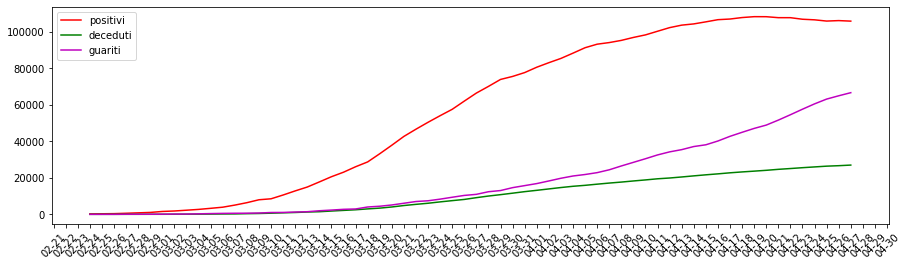

In [4]:
#Plot data with misleading colors
plt.figure(figsize=(15,4))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values,pos, 'r')
plt.xticks(rotation=45)
plt.plot(x_values, dec, 'g')
plt.plot(x_values, gua, 'm')
plt.legend(['positivi', 'deceduti', 'guariti'])
plt.show()

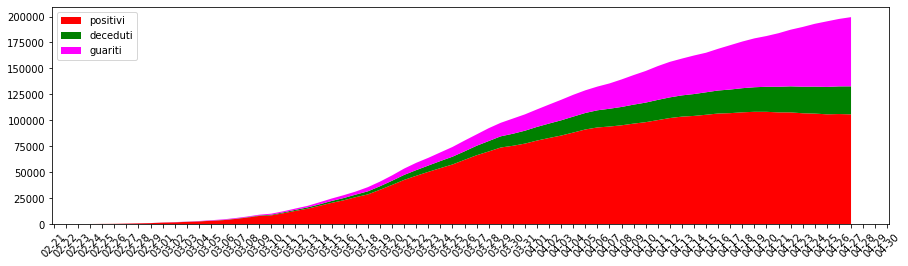

In [5]:
#Misleading colurs stacked version
plt.figure(figsize=(15,4))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.stackplot(x_values, pos, dec, gua, colors=['red', 'green', 'magenta'])
plt.xticks(rotation=45)
plt.legend(['positivi', 'deceduti', 'guariti'], loc='upper left')
plt.show()

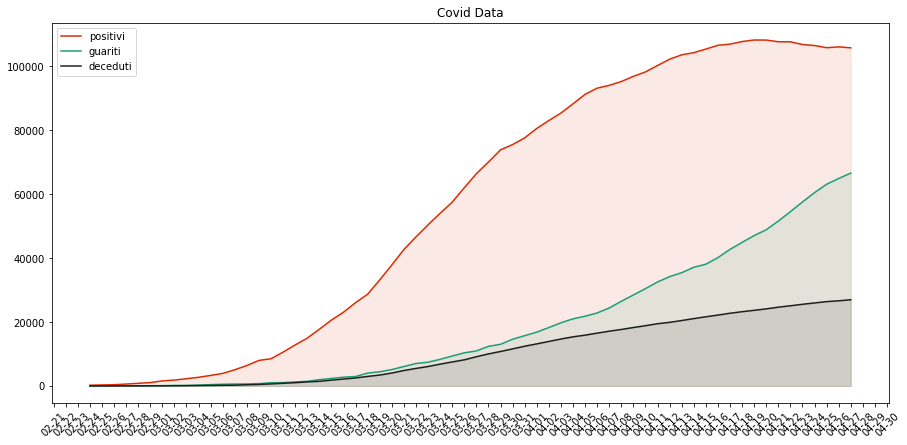

In [6]:
#Misleading plot with transparent area
plt.figure(figsize=(15,7))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

c1=[x/255 for x in (217,45,2)]
c2=[x/255 for x in (27,32,29)]
c3=[x/255 for x in (27,158,119)]
plt.plot(x_values, pos, color=c1)
plt.plot(x_values, gua, color=c3)
plt.plot(x_values, dec, color=c2)
ax.fill_between(x_values, 0, pos, color=c1, alpha=0.1)
ax.fill_between(x_values, 0, gua, color=c3, alpha=0.1)
ax.fill_between(x_values, 0, dec, color=c2, alpha=0.1)
plt.xticks(rotation=45)
plt.title("Covid Data")
plt.legend(['positivi','guariti', 'deceduti'], loc='upper left')
plt.show()

In [7]:
#Correlation WIFI-Covid in Milan
nuovi_data = csv['nuovi_positivi']
wifi_csv = pd.read_csv('http://dati.comune.milano.it/dataset/4682cb43-fcb4-488e-b4db-a8b88f3ef1fe/resource/07caba9c-770e-4466-90dc-e09a686a3b7d/download/20200408-230033_registered.csv', sep=';', parse_dates=True)
wifi_csv=wifi_csv[wifi_csv['Data']>='2020-02-24 00:00:00+02:00']
wifi_data=wifi_csv.groupby(['Data']).sum()

In [20]:
extract = 48

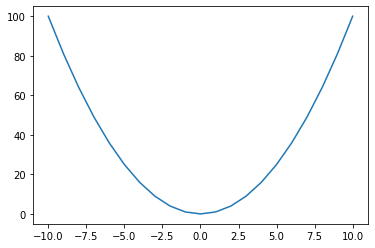

MIC = 0.9983636725938129
PearsonResult  (correlation=0.0, p_value=1.0000000000000004
SpearmanrResult(correlation=0.0, pvalue=1.0)


In [21]:
import numpy as np
from minepy import MINE
x=np.arange(-10,11)
y=x*x
plt.plot(x,y)
plt.show()
mine = MINE()
mine.compute_score(x, y)
score = mine.mic()
print(f"MIC = {score}")
c, p=st.pearsonr(x, y)
print(f"PearsonResult  (correlation={c}, p_value={p}")
print(st.spearmanr(x, y))

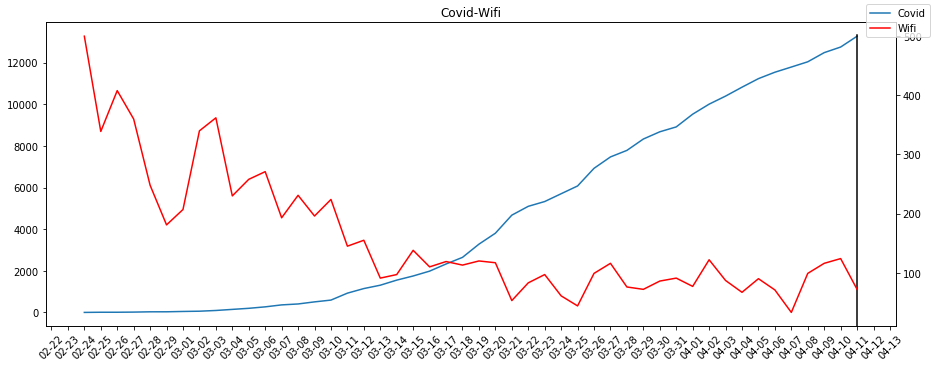

PearsonResult  (correlation=-0.6658875519808374, p_value=2.4069077431869363e-07
SpearmanrResult(correlation=-0.8025622977653539, pvalue=6.9059253279365085e-12)


In [22]:
#Milan wifi-covid case chart

milan = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv', error_bad_lines=False)

milan = milan[milan['denominazione_provincia']=="Milano"]
milan.head()
datesm=milan['data']
mx_values = [d[:d.find('T')] for d in datesm ]
mx_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in mx_values]
mnuovi_data=milan['totale_casi']
fig, ax1 = plt.subplots(figsize=(13,5))
ax2 = ax1.twinx()

formatter = mdates.DateFormatter("%m-%d")

locator =mdates.DayLocator()
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)

ax1.plot(mx_values[:extract], mnuovi_data[:extract])
ax2.plot(mx_values[:extract], wifi_data['Valore'].iloc[:extract], 'r-')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45 )
fig.legend(["Covid", "Wifi"])
ax1.axvline(x=mx_values[extract-1], ymax=0.96, color='black')
fig.tight_layout()
plt.title("Covid-Wifi")
plt.show()

c, p=st.pearsonr(mnuovi_data[:extract] ,wifi_data['Valore'].iloc[:extract])
print(f"PearsonResult  (correlation={c}, p_value={p}")
print(st.spearmanr(mnuovi_data[:extract],wifi_data['Valore'].iloc[:extract]))

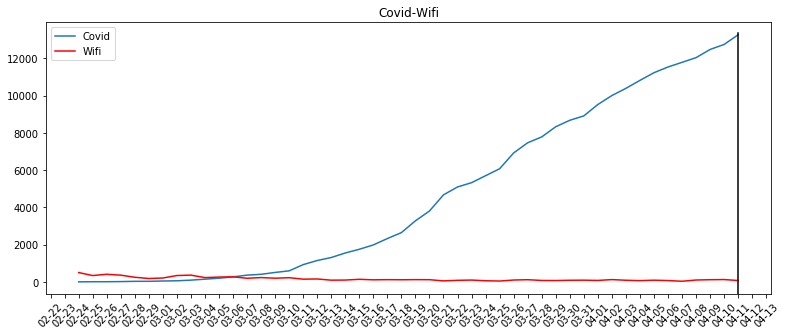

In [23]:
#Milan wifi-covid case absolute chart
plt.figure(figsize=(13,5))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(mx_values[:extract], mnuovi_data[:extract])
plt.plot(mx_values[:extract], wifi_data['Valore'].iloc[:extract], 'r-')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45 )

plt.axvline(x=mx_values[extract-1], ymax=0.96, color='black')
fig.tight_layout()
plt.title("Covid-Wifi")
plt.xticks(rotation=45)
plt.legend(["Covid", "Wifi"])
plt.show()

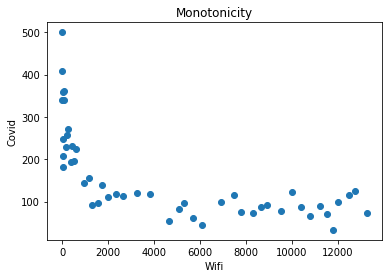

MIC = 0.9182958340544898


In [24]:
#Monotonicity
plt.scatter(mnuovi_data[:extract], wifi_data['Valore'].iloc[:extract])
plt.xlabel("Wifi")
plt.ylabel("Covid")
plt.title("Monotonicity")
plt.show()

mine = MINE()
mine.compute_score(mnuovi_data[:extract], wifi_data['Valore'].iloc[:extract])
score = mine.mic()
print(f"MIC = {score}")